[Google Colab](https://colab.research.google.com/github/https:/github.com/NeginS98/Regression_Melbourne-_housing_marketipynb)

## **Load Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import random 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Melbourne_housing_FULL.csv to Melbourne_housing_FULL.csv


In [318]:
data = pd.read_csv('Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [319]:
data.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34857,34857,34857.000000,34857,2.724700e+04,34857,34857,34857,34856.000000,34856.000000,...,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854,26881.000000,26881.000000,34854,34854.000000
unique,351,34009,NaN,3,NaN,9,388,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Jellis,28/10/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,844,6,NaN,23980,NaN,19744,3359,1119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3675,NaN,NaN,11836,NaN
mean,NaN,NaN,3.031012,NaN,1.050173e+06,NaN,NaN,NaN,11.184929,3116.062859,...,1.624798,1.728845,593.598993,160.25640,1965.289885,NaN,-37.810634,145.001851,NaN,7572.888306
std,NaN,NaN,0.969933,NaN,6.414671e+05,NaN,NaN,NaN,6.788892,109.023903,...,0.724212,1.010771,3398.841946,401.26706,37.328178,NaN,0.090279,0.120169,NaN,4428.090313
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.00000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3051.000000,...,1.000000,1.000000,224.000000,102.00000,1940.000000,NaN,-37.862950,144.933500,NaN,4385.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.300000,3103.000000,...,2.000000,2.000000,521.000000,136.00000,1970.000000,NaN,-37.807600,145.007800,NaN,6763.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3156.000000,...,2.000000,2.000000,670.000000,188.00000,2000.000000,NaN,-37.754100,145.071900,NaN,10412.000000


In [320]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [321]:
info = pd.DataFrame({'Missing data': data.isnull().sum(), 
                     'Type of data': data.dtypes, 
                     'Count of Data': len(data)})
info

,Missing data,Type of data,Count of Data
Suburb,0,object,34857
Address,0,object,34857
Rooms,0,int64,34857
Type,0,object,34857
Price,7610,float64,34857
Method,0,object,34857
SellerG,0,object,34857
Date,0,object,34857
Distance,1,float64,34857
Postcode,1,float64,34857


In [322]:
df_pre = data.copy()
col = ['Bedroom2', 'Bathroom']
for i in col:
  df_pre[i] = pd.to_numeric(df_pre[i])
df_pre

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


In [323]:
df_pre.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [324]:
df = df_pre.copy()
df.drop(['BuildingArea'], axis=1, inplace=True)
df.dropna(inplace=True)
info1 = pd.DataFrame({'Missing data': df.isnull().sum(), 
                     'Type of data': df.dtypes, 
                     'Count of Data': len(df)})
info1

,Missing data,Type of data,Count of Data
Suburb,0,object,10459
Address,0,object,10459
Rooms,0,int64,10459
Type,0,object,10459
Price,0,float64,10459
Method,0,object,10459
SellerG,0,object,10459
Date,0,object,10459
Distance,0,float64,10459
Postcode,0,float64,10459


## **Visualization**

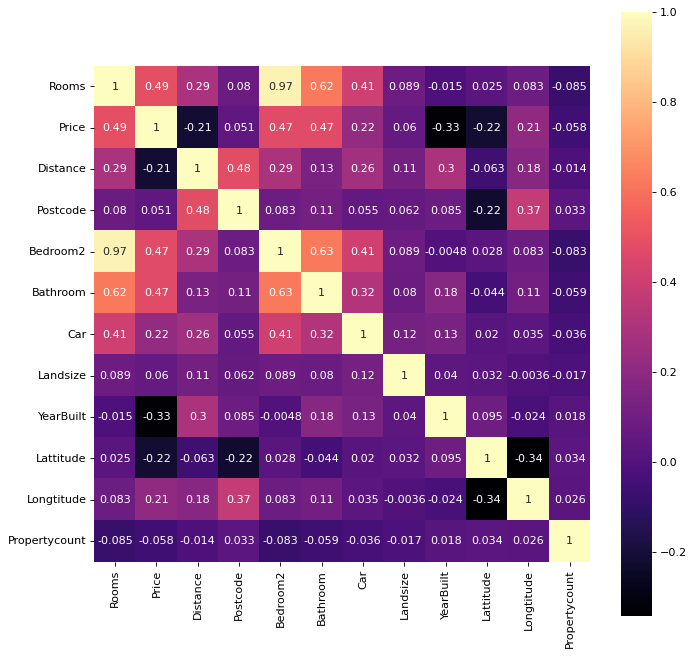

In [325]:
plt.figure(figsize=(10, 10), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap='magma', square=True)
plt.show()

In [326]:
correlation = df.corr()
correlation.iloc[1:2, :].T

,Price
Rooms,0.486179
Price,1.000000
Distance,-0.214574
Postcode,0.050595
Bedroom2,0.472357
Bathroom,0.473302
Car,0.217049
Landsize,0.059877
YearBuilt,-0.328743
Lattitude,-0.219626


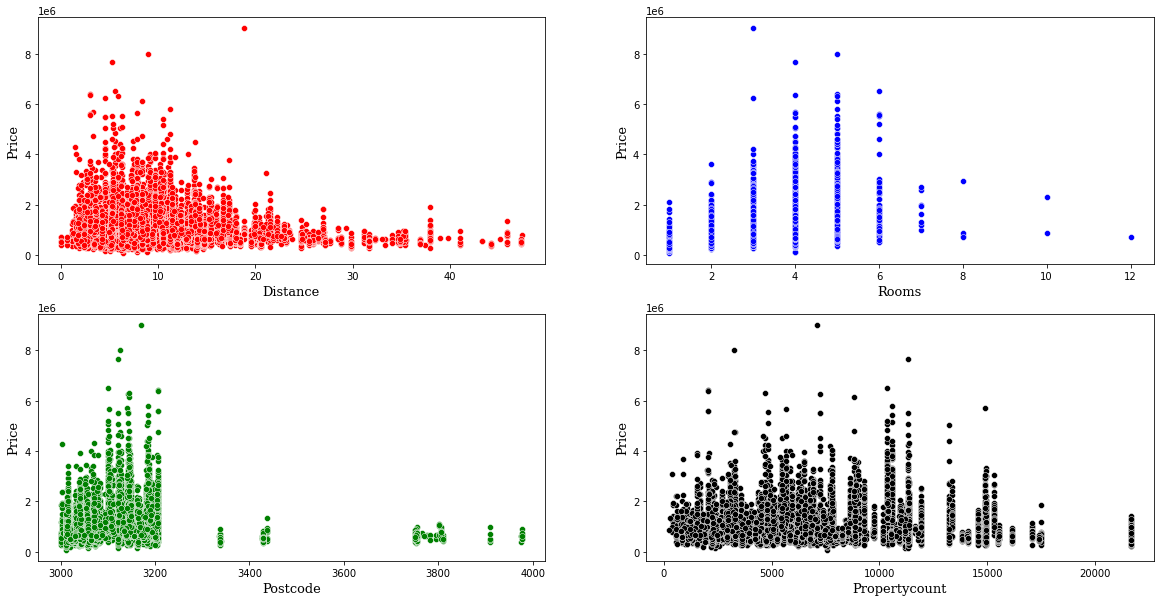

In [327]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
sns.scatterplot(data = df, x = df.Distance, y = df.Price, color='r')
plt.xlabel('Distance', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.subplot(222)
sns.scatterplot(data = df, x = df.Rooms, y = df.Price, color='b')
plt.xlabel('Rooms', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.subplot(223)
sns.scatterplot(data = df, x = df.Postcode, y = df.Price, color='green')
plt.xlabel('Postcode', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.subplot(224)
sns.scatterplot(data = df, x = df.Propertycount, y = df.Price, color='black')
plt.xlabel('Propertycount', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.show()

### Noise Detection

In [328]:
noise = pd.DataFrame({
    'High (rooms)': list(df.Rooms.nlargest(5)),
    'Low (rooms)': list(df.Rooms.nsmallest(5)),
    'High (Price)': list(df.Price.nlargest(5)),
    'Low (Price)': list(df.Price.nsmallest(5)),
    'High (Postcode)': list(df.Postcode.nlargest(5)),
    'Low (Postcode)': list(df.Postcode.nsmallest(5)),
    'High (Distance)': list(df.Distance.nlargest(5)),
    'Low (Distance)': list(df.Distance.nsmallest(5)),
    'High (Propertycount)': list(df.Propertycount.nlargest(5)),
    'Low (Propertycount)': list(df.Propertycount.nsmallest(5)),
})

noise

,High (rooms),Low (rooms),High (Price),Low (Price),High (Postcode),Low (Postcode),High (Distance),Low (Distance),High (Propertycount),Low (Propertycount)
0,12,1,9000000.0,85000.0,3977.0,3000.0,47.4,0.0,21650.0,249.0
1,10,1,8000000.0,131000.0,3977.0,3000.0,47.3,0.0,21650.0,290.0
2,10,1,7650000.0,145000.0,3977.0,3000.0,47.3,0.0,21650.0,389.0
3,8,1,6500000.0,160000.0,3977.0,3000.0,47.3,0.0,21650.0,389.0
4,8,1,6400000.0,170000.0,3977.0,3000.0,47.3,0.0,21650.0,389.0


In [487]:
df_clean = df.copy()
df_clean.drop(df_clean.index[df_clean.Price >= 9000000.0], inplace=True)
df_clean.drop(df_clean.index[df_clean.Rooms >= 11], inplace=True)
df_clean.drop(df_clean.index[df_clean.Postcode >= 3300], inplace=True)
df_clean.drop(df_clean.index[df_clean.Propertycount >= 20000], inplace=True)

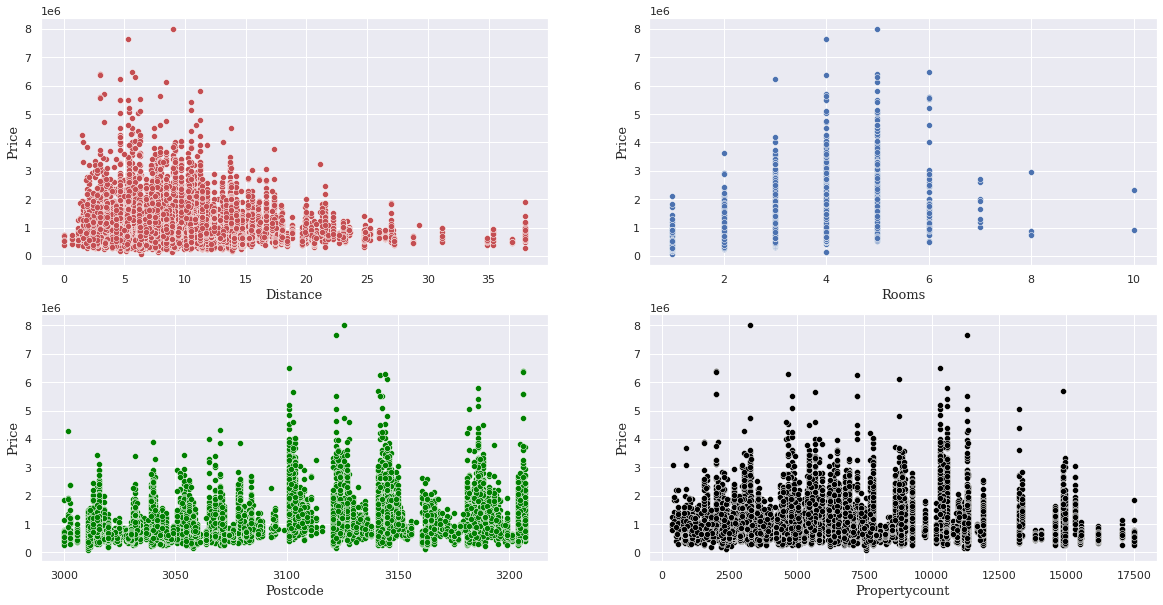

In [488]:
plt.figure(figsize=(20, 10))
plt.subplot(221)
sns.scatterplot(data = df_clean, x = df_clean.Distance, y = df_clean.Price, color='r')
plt.xlabel('Distance', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.subplot(222)
sns.scatterplot(data = df_clean, x = df_clean.Rooms, y = df_clean.Price, color='b')
plt.xlabel('Rooms', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.subplot(223)
sns.scatterplot(data = df_clean, x = df_clean.Postcode, y = df_clean.Price, color='green')
plt.xlabel('Postcode', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.subplot(224)
sns.scatterplot(data = df_clean, x = df_clean.Propertycount, y = df_clean.Price, color='black')
plt.xlabel('Propertycount', fontfamily = 'serif', fontsize=13)
plt.ylabel('Price', fontfamily = 'serif', fontsize=13)

plt.show()

In [489]:
df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount'],
      dtype='object')

In [490]:
total_sales = df_clean['Price'].sum()
# Slice date column into month and year variables
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format="%d/%m/%Y")
df_clean['Month'] = df_clean['Date'].dt.month
df_clean['Year'] = df_clean['Date'].dt.year

# calculate monthly sales percent
def month_sales(df_clean, month, sales=total_sales):
    share_month_sales = df_clean['Price'].loc[df_clean['Month'] == month].sum()/sales
    return share_month_sales

month_total_sales = []
for i in range(0, 12):
  month_sales_val = month_sales(df_clean, i+1)
  month_total_sales.append(month_sales_val)

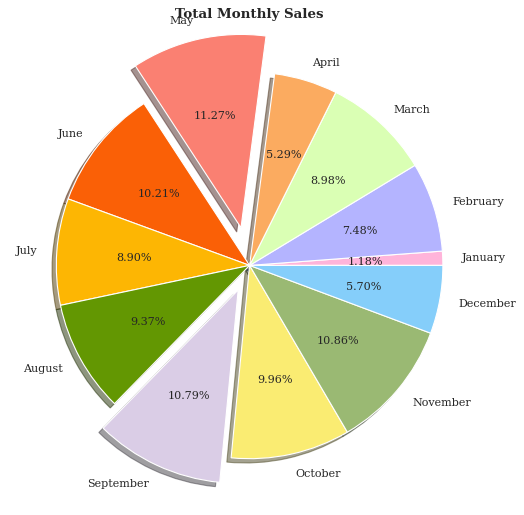

In [491]:
labels = ['January', 'February', 'March', 'April',
          'May', 'June', 'July', 'August', 'September',
          'October', 'November', 'December']

colors = ['#ffb4da', '#b4b4ff', '#daffb4', '#fbab60', '#fa8072', '#FA6006',
          '#FDB603', '#639702', '#dacde6', '#faec72', '#9ab973', '#85cefa']
ex = (0, 0, 0, 0, 0.2, 0, 0, 0, 0.14, 0, 0, 0)


plt.figure(figsize=(8, 8),dpi=80)

plt.pie(month_total_sales, autopct='%1.2f%%', 
        textprops={'fontfamily':'serif', 'fontsize':10}, explode=ex, 
        labels=labels, colors= colors, shadow=True)

plt.title('Total Monthly Sales', fontsize = 12, 
          fontfamily='serif', fontweight='bold')

plt.show()

In [492]:
df_clean.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'Propertycount', 'Month', 'Year'],
      dtype='object')

**Unique value of dataset**

In [493]:
for column in list(df_clean.columns):
  print(f'{str.capitalize(column)} : {df_clean[column].nunique()} unique value')

Suburb : 275 unique value
Address : 9778 unique value
Rooms : 9 unique value
Type : 3 unique value
Price : 1944 unique value
Method : 5 unique value
Sellerg : 250 unique value
Date : 77 unique value
Distance : 174 unique value
Postcode : 164 unique value
Bedroom2 : 11 unique value
Bathroom : 10 unique value
Car : 11 unique value
Landsize : 1290 unique value
Yearbuilt : 150 unique value
Councilarea : 29 unique value
Lattitude : 5899 unique value
Longtitude : 6405 unique value
Regionname : 7 unique value
Propertycount : 272 unique value
Month : 12 unique value
Year : 3 unique value


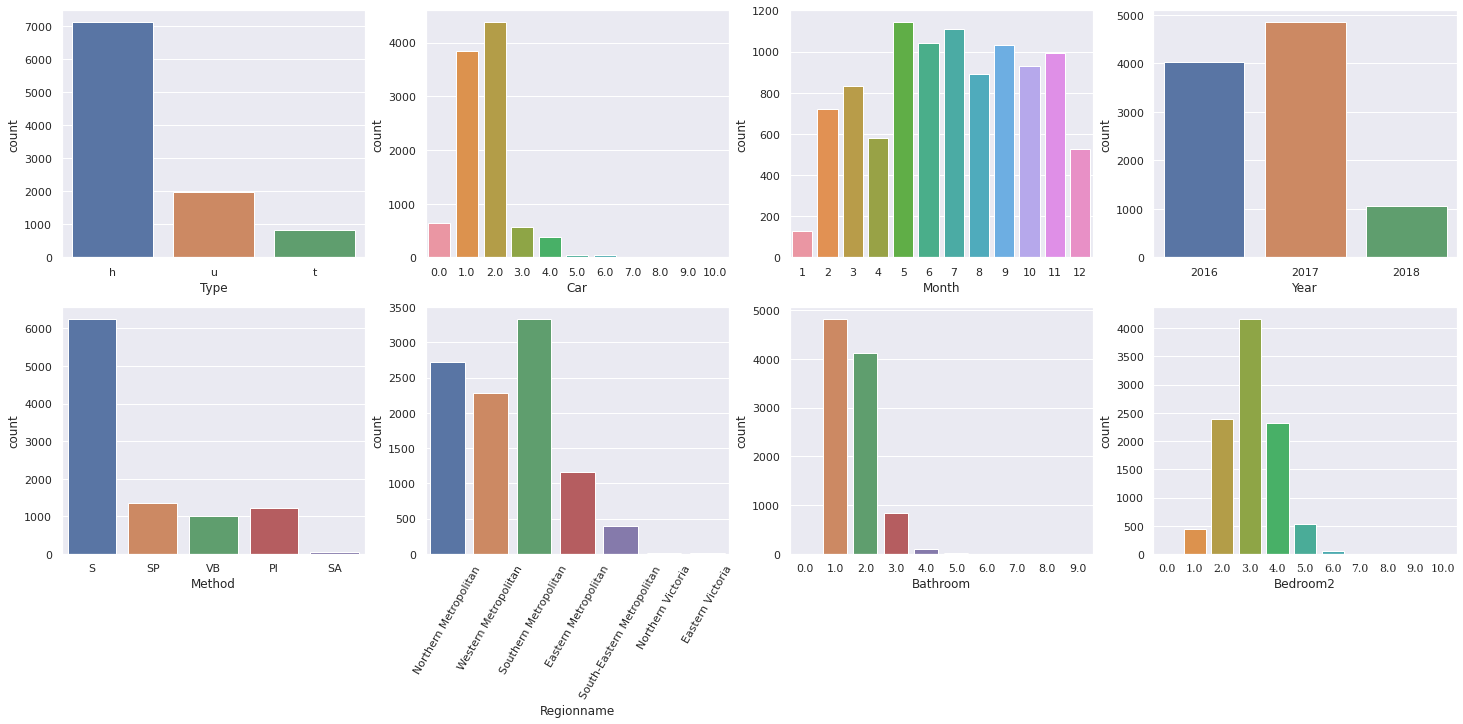

In [494]:
categorical = ['Type','Car', 'Month', 'Year', 'Method', 'Regionname', 'Bathroom', 'Bedroom2']

i = 0
while i < 8:
    fig = plt.figure(figsize= [25, 10])
    plt.subplot(241)
    sns.countplot(x = categorical[i], data= df_clean)
    i += 1 
    plt.subplot(242)
    sns.countplot(x = categorical[i], data= df_clean)
    i += 1
    plt.subplot(243)
    sns.countplot(x = categorical[i], data= df_clean)
    i += 1
    plt.subplot(244)
    sns.countplot(x = categorical[i], data= df_clean)
    i += 1
    plt.subplot(245)
    sns.countplot(x = categorical[i], data= df_clean)
    i += 1    
    plt.subplot(246)
    sns.countplot(x = categorical[i], data= df_clean)
    plt.xticks(rotation=60)
    i += 1    
    plt.subplot(247)
    sns.countplot(x = categorical[i], data= df_clean)
    i += 1    
    plt.subplot(248)
    sns.countplot(x = categorical[i], data= df_clean)
    i += 1
    plt.xticks(fontfamily = 'serif')
    plt.show()


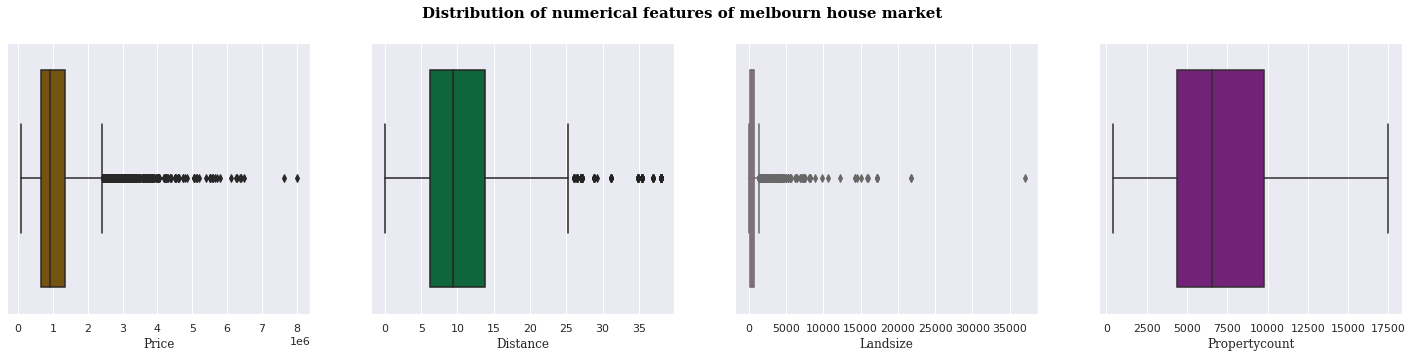

In [495]:
numerical = ['Price', 'Distance','Landsize','Propertycount']


fig, axes = plt.subplots(1, 4, figsize=(25, 5), sharey=True)

fig.suptitle("Distribution of numerical features of melbourn house market", fontfamily='serif',
             fontsize=15, fontweight='bold', color='black')

for num, column in enumerate(numerical):
  a = random.random()
  b = random.random()
  c = random.random()
  color = (a, b, c) 
  sns.boxplot(ax=axes[num],x =df_clean[column], color= color)
  axes[num].set_xlabel(column,  fontfamily='serif', fontsize=12)  
plt.show()

In [496]:
df_clean.reset_index(inplace=True, drop=True)

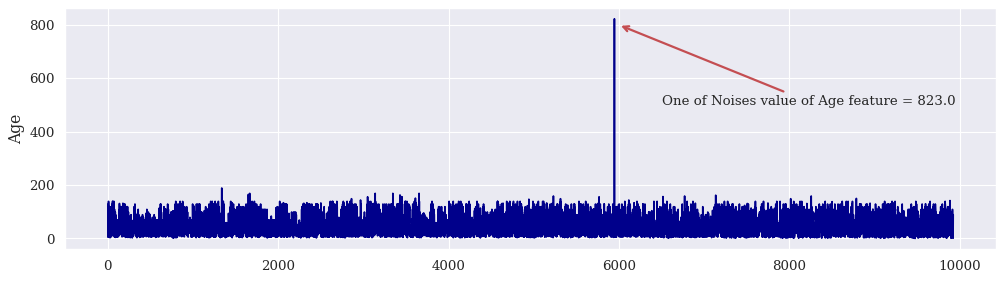

In [497]:
df_clean['Age'] = 2019 - df_clean['YearBuilt']


sns.set()
plt.figure(figsize=(15, 4), dpi=80)
plt.plot(df_clean['Age'], color='darkblue')
plt.annotate(f'One of Noises value of Age feature = {max(df_clean.Age)}', xy=(6000, 800), xytext=(6500, 500), fontfamily='serif', fontsize=12,     
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='r', lw=2))
plt.ylabel('Age', fontfamily='serif', fontsize=14)
plt.xticks(fontfamily='serif', fontsize=12)
plt.yticks(fontfamily='serif', fontsize=12)
plt.show()


In [498]:
df_clean.drop(df_clean.index[df_clean.Age >= 800], inplace=True)
df_clean.reset_index(inplace=True, drop=True)
df_clean.Age.describe()

count    9924.000000
mean       54.066909
std        36.064025
min         0.000000
25%        21.000000
50%        49.000000
75%        79.000000
max       189.000000
Name: Age, dtype: float64

## **Encoding variables**

In [499]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df_clean.copy()

def Encoder_lbl(features_val, columns_name):
  lbl = LabelEncoder()
  labels = lbl.fit_transform(features_val)
  df_encoded[columns_name + '_label'] = labels

col = ['CouncilArea', 'Type', 'Method', 'Regionname','Suburb']

for i in col:
  Encoder_lbl(df_clean[i], i)
# drop unnecessary columns for creating our regression model
columns = ['Date','Address', 'SellerG', 'CouncilArea',
           'Type', 'Method', 'Regionname','Suburb', 'Month'	,'Year']

for column in columns:
  df_encoded.drop(column, axis=1, inplace=True)
df_encoded

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,YearBuilt,Lattitude,Longtitude,Propertycount,Age,CouncilArea_label,Type_label,Method_label,Regionname_label,Suburb_label
0,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,1900.0,-37.80790,144.99340,4019.0,119.0,27,0,1,2,0
1,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,1900.0,-37.80930,144.99440,4019.0,119.0,27,0,3,2,0
2,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,2014.0,-37.80720,144.99410,4019.0,5.0,27,0,4,2,0
3,3,1876000.0,2.5,3067.0,4.0,2.0,0.0,245.0,1910.0,-37.80240,144.99930,4019.0,109.0,27,0,1,2,0
4,2,1636000.0,2.5,3067.0,2.0,1.0,2.0,256.0,1890.0,-37.80600,144.99540,4019.0,129.0,27,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,2,940000.0,6.8,3016.0,2.0,2.0,1.0,122.0,1999.0,-37.86396,144.90541,6380.0,20.0,9,0,4,6,269
9920,3,830000.0,6.8,3016.0,3.0,1.0,2.0,345.0,1949.0,-37.85545,144.88118,802.0,70.0,9,0,1,6,270
9921,2,888000.0,6.3,3013.0,2.0,2.0,1.0,98.0,2018.0,-37.81551,144.88826,6543.0,1.0,14,0,3,6,274
9922,2,705000.0,6.3,3013.0,2.0,1.0,2.0,220.0,2000.0,-37.82286,144.87856,6543.0,19.0,14,1,1,6,274


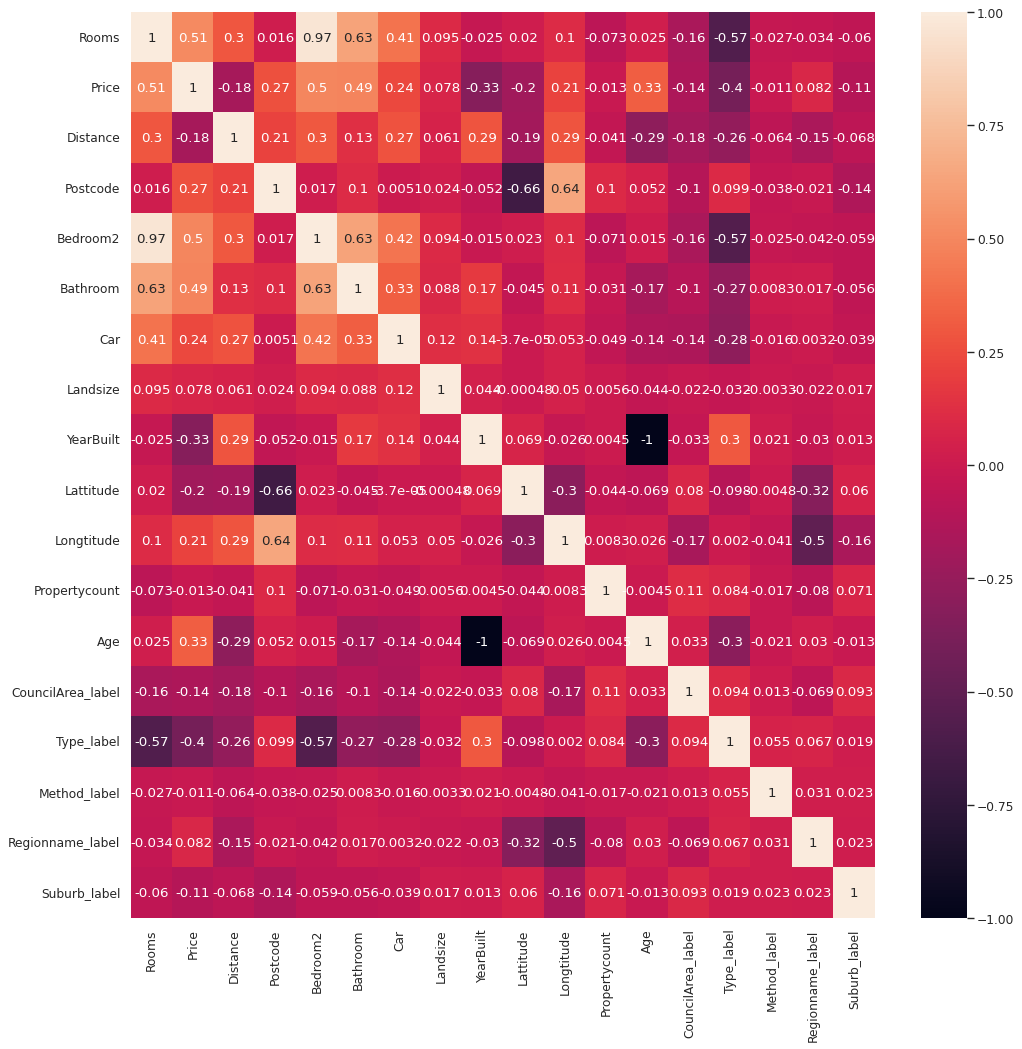

In [503]:
plt.figure(figsize=(15, 15), dpi=80)
sns.heatmap(df_encoded.corr(), annot=True)
plt.show()

## **Simple Regression Model** 

In [504]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [505]:
df_encoded.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age', 'CouncilArea_label', 'Type_label', 'Method_label',
       'Regionname_label', 'Suburb_label'],
      dtype='object')

In [506]:
x = df_encoded.drop(['Price', 'Distance', 'Postcode',
       'Landsize', 'Propertycount',
       'CouncilArea_label', 'Method_label', 'Regionname_label',
       'Suburb_label'], axis = 1) 
y = df_encoded.Price

In [507]:
def linear_Regression_model(x, y, testsize):
  eval = pd.DataFrame()
  for TestSize in testsize:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TestSize, random_state=0)
    model = LinearRegression()
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    eval_dict = {'test size': TestSize, 
                 'MAE': metrics.mean_absolute_error(y_test, y_pred),
                 'MSE':metrics.mean_squared_error(y_test, y_pred), 
                 'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                 'R2 Score':metrics.r2_score(y_test, y_pred),
                 }
    eval = eval.append(eval_dict, ignore_index=True)
  return (eval)

In [508]:
testsize = np.linspace(0.15, 0.35, 10)
linear_Regression_model(x, y, testsize)

,test size,MAE,MSE,RMSE,R2 Score
0,0.150000,327511.977166,2.410762e+11,490995.085958,0.473463
1,0.172222,325112.799415,2.402695e+11,490172.949987,0.472520
2,0.194444,323499.385492,2.411807e+11,491101.555740,0.475076
3,0.216667,324294.438866,2.445430e+11,494512.900428,0.474523
4,0.238889,319164.142556,2.373709e+11,487207.195540,0.472070
5,0.261111,318264.137413,2.301599e+11,479749.880946,0.471279
6,0.283333,317503.199147,2.275638e+11,477036.460353,0.472337
7,0.305556,315280.118035,2.231542e+11,472392.036622,0.469750
8,0.327778,312976.276668,2.234502e+11,472705.203357,0.471719
9,0.350000,315825.576281,2.255277e+11,474897.566033,0.471381


In [509]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
kfold = KFold(25)
print(cross_val_score(model, x, y.ravel(), n_jobs=-1, cv=kfold))

[0.49505695 0.44592738 0.55139459 0.57602959 0.6601606  0.62415151
 0.56328963 0.4762774  0.48692272 0.47826232 0.48323612 0.54725122
 0.53833506 0.46219792 0.42461752 0.3226254  0.48840153 0.20094003
 0.39826762 0.32338537 0.4162706  0.3493848  0.28441121 0.44087775
 0.43463745]


In [510]:
len(x) / 25

396.96

In [512]:
df_KF18 = df_encoded[(df_encoded.index >= 7146) & (df_encoded.index <= 7940)]
df_KF20_to_23 = df_encoded[(df_encoded.index >= 7940) & (df_encoded.index <= 9528)]

df_1 =  df_encoded[(df_encoded.index < 7146)]
df_2 =  df_encoded[(df_encoded.index > 9528)]

df_post = df_1.append(df_2)
df_post.reset_index(inplace=True, drop=True)

In [513]:
X = df_post.drop('Price', axis=1)
Y = df_post.Price

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
kfold = KFold(10)
print(cross_val_score(model, x, y.ravel(), n_jobs=-1, cv=kfold))

[0.49663885 0.61218032 0.59143879 0.46226402 0.52404655 0.46502423
 0.39388008 0.35821719 0.36712672 0.42531593]


In [514]:
testsize = np.linspace(0.15, 0.35, 5)
linear_Regression_model(X, Y, testsize)

,test size,MAE,MSE,RMSE,R2 Score
0,0.15,271118.012780,1.604382e+11,400547.431386,0.623999
1,0.20,266339.908323,1.553523e+11,394147.522307,0.616627
2,0.25,268687.715014,1.581502e+11,397681.032385,0.619983
3,0.30,269391.998712,1.572468e+11,396543.566458,0.630365
4,0.35,268385.227767,1.553693e+11,394169.075602,0.635130


In [515]:
def check(dim, testsize):
  r2 = 0.525328
  x = df_post.drop(['Price'], axis = 1)
  y = df_post.Price  
  for column in x:
    New_Col_Name = column +'_'+ str(dim)
    New_Col_Val = x[column] ** dim
    x.insert(0, New_Col_Name, New_Col_Val)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=0)
    New_Model = LinearRegression()
    New_Model.fit(x_train, y_train)
    y_pred = New_Model.predict(x_test)
    r2_new = metrics.r2_score(y_test, y_pred)
    if r2_new < r2:
      x.drop([New_Col_Name], axis=1, inplace=True)
    else:
      r2 = r2_new
  print('R2 Score :',r2)
  return(x)

check(2, 0.25)

R2 Score : 0.6364925430239396


,Regionname_label_2,Method_label_2,Type_label_2,CouncilArea_label_2,Propertycount_2,YearBuilt_2,Car_2,Bedroom2_2,Postcode_2,Distance_2,...,YearBuilt,Lattitude,Longtitude,Propertycount,Age,CouncilArea_label,Type_label,Method_label,Regionname_label,Suburb_label
0,4,1,0,729,16152361.0,3610000.0,0.0,4.0,9406489.0,6.25,...,1900.0,-37.80790,144.99340,4019.0,119.0,27,0,1,2,0
1,4,9,0,729,16152361.0,3610000.0,0.0,9.0,9406489.0,6.25,...,1900.0,-37.80930,144.99440,4019.0,119.0,27,0,3,2,0
2,4,16,0,729,16152361.0,4056196.0,4.0,9.0,9406489.0,6.25,...,2014.0,-37.80720,144.99410,4019.0,5.0,27,0,4,2,0
3,4,1,0,729,16152361.0,3648100.0,0.0,16.0,9406489.0,6.25,...,1910.0,-37.80240,144.99930,4019.0,109.0,27,0,1,2,0
4,4,1,0,729,16152361.0,3572100.0,4.0,4.0,9406489.0,6.25,...,1890.0,-37.80600,144.99540,4019.0,129.0,27,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7536,36,16,0,81,40704400.0,3996001.0,1.0,4.0,9096256.0,46.24,...,1999.0,-37.86396,144.90541,6380.0,20.0,9,0,4,6,269
7537,36,1,0,81,643204.0,3798601.0,4.0,9.0,9096256.0,46.24,...,1949.0,-37.85545,144.88118,802.0,70.0,9,0,1,6,270
7538,36,9,0,196,42810849.0,4072324.0,1.0,4.0,9078169.0,39.69,...,2018.0,-37.81551,144.88826,6543.0,1.0,14,0,3,6,274
7539,36,1,1,196,42810849.0,4000000.0,4.0,4.0,9078169.0,39.69,...,2000.0,-37.82286,144.87856,6543.0,19.0,14,1,1,6,274


In [517]:
X = df_post.drop('Price', axis=1)
Y = df_post.Price

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
kfold = KFold(10)
print(cross_val_score(model, x, y.ravel(), n_jobs=-1, cv=kfold))

[0.49663885 0.61218032 0.59143879 0.46226402 0.52404655 0.46502423
 0.39388008 0.35821719 0.36712672 0.42531593]


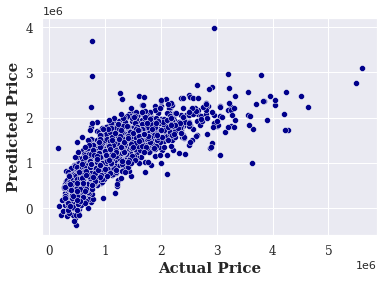

In [518]:
sns.scatterplot(x=y_test, y=y_pred, color = 'darkblue')
plt.xlabel('Actual Price', fontfamily = 'serif', fontsize = 15, fontweight='bold')
plt.ylabel('Predicted Price', fontfamily = 'serif', fontsize = 15, fontweight='bold')
plt.xticks(fontfamily = 'serif', fontsize = 12)
plt.yticks(fontfamily = 'serif', fontsize = 12)
plt.show()

# **Ensemble Models**

In [524]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor

In [576]:
x = df_post[['Rooms','Age', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt', 'Lattitude','Longtitude', 'Type_label']].copy()
y = df_post[['Price']].copy()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## **Random Forest Regression**

In [520]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


rf_random = RandomizedSearchCV(estimator = model_RF_Reg, param_distributions = random_grid, n_iter = 50,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random = rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [581]:
RF_Pred = rf_random.predict(X_test)

In [521]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1344}

In [522]:
rf_tuned = RandomForestRegressor(n_estimators = 566,
 min_samples_split = 52,
 min_samples_leaf = 2,
 max_depth = None,
 bootstrap= True)

In [523]:
rf_random.score(X_train, y_train)

0.9355974945225584

In [525]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold5 = KFold(n_splits=5, random_state=1, shuffle=True)                        

MAE_rf = cross_val_score(rf_tuned, x, y, scoring='neg_mean_absolute_error',cv = kfold5, n_jobs=-1)
RMSE_rf = cross_val_score(rf_tuned, x, y, scoring='neg_root_mean_squared_error',cv = kfold5, n_jobs=-1)
MSE_rf = cross_val_score(rf_tuned, x, y, scoring='neg_mean_squared_error',cv = kfold5, n_jobs=-1)
R2_rf = cross_val_score(rf_tuned, x, y, scoring='r2',cv = kfold5, n_jobs=-1)

In [526]:
accuracy = pd.DataFrame({'KFold':range(5),'MAE':MAE_rf,'RMSE': RMSE_rf, 
                         'MSE':MSE_rf ,'R2 score':R2_rf}).set_index('KFold')
accuracy

,MAE,RMSE,MSE,R2 score
KFold,,,,
0,-212572.932158,-353571.525086,-1.254289e+11,0.706153
1,-207578.049122,-329351.286174,-1.096576e+11,0.751996
2,-201121.960018,-348260.704014,-1.209402e+11,0.750464
3,-204467.513131,-350207.899520,-1.222102e+11,0.712336
4,-206271.528887,-339723.010002,-1.160214e+11,0.759592


## **Gradient Descent**


In [530]:
GD_model = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.05, loss = 'ls')
GD_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='ls', max_depth=5,
                          n_estimators=400)

In [571]:
GD_model_pred = GD_model.predict(X_test)

In [544]:
MAE_rf = cross_val_score(GD_model, x, y, scoring='neg_mean_absolute_error',cv = kfold5, n_jobs=-1)
RMSE_rf = cross_val_score(GD_model, x, y, scoring='neg_root_mean_squared_error',cv = kfold5, n_jobs=-1)
MSE_rf = cross_val_score(GD_model, x, y, scoring='neg_mean_squared_error',cv = kfold5, n_jobs=-1)
R2_rf = cross_val_score(GD_model, x, y, scoring='r2',cv = kfold5, n_jobs=-1)

In [545]:
accuracy = pd.DataFrame({'KFold':range(5),'MAE':MAE_rf,'RMSE': RMSE_rf, 
                         'MSE':MSE_rf ,'R2 score':R2_rf}).set_index('KFold')
accuracy

,MAE,RMSE,MSE,R2 score
KFold,,,,
0,-196843.386177,-329343.666638,-1.077493e+11,0.747195
1,-197396.997297,-317783.835066,-1.011408e+11,0.770340
2,-193131.990386,-321596.110339,-1.024356e+11,0.787606
3,-195253.031086,-335415.101185,-1.126417e+11,0.736943
4,-197513.652427,-321846.940767,-1.033924e+11,0.786895


## **AdaBoostRegressor**

In [551]:
#AdaBoost Regressor
AD_model = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
         n_estimators=100, random_state=None)
AD_model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, n_estimators=100)

In [554]:
AD_model_pred = AD_model.predict(X_test) 
compare_AD = pd.DataFrame(y_test)
compare_AD.insert(0, 'Pred_AD_model',list(AD_model_pred))

# **Final Result**

**The best models obtained after calculations, trial and error**

1. Random Forest Regressor
2. Gradient Boosting Regressor
3. Linear Regression
4. AdaBoost Regressor


In [619]:
compare_dataFrame = pd.DataFrame(y_test)
compare_dataFrame.insert(1,'pred_GD',list(GD_model_pred))
compare_dataFrame.insert(2,'pred_AD', list(AD_model_pred))
compare_dataFrame.insert(3, 'pred_RF', list(RF_Pred))
compare_dataFrame.insert(1, 'pred_LR', y_pred)
compare_dataFrame

,Price,pred_LR,pred_GD,pred_AD,pred_RF
4088,1350000.0,1.324676e+06,1.180012e+06,1.281547e+06,1.176388e+06
2149,480000.0,9.137008e+05,6.727725e+05,9.550017e+05,6.935871e+05
5894,996000.0,9.319407e+05,8.233816e+05,1.239075e+06,9.146420e+05
7135,2200000.0,2.091787e+06,1.728215e+06,1.454358e+06,2.100298e+06
7399,1330000.0,8.609186e+05,1.288721e+06,1.063124e+06,1.161833e+06
...,...,...,...,...,...
1772,747000.0,9.743516e+05,7.559132e+05,1.244027e+06,8.118224e+05
7097,1400000.0,1.558432e+06,1.446444e+06,1.747475e+06,1.469024e+06
5421,752500.0,9.721058e+05,8.876660e+05,1.185140e+06,9.270306e+05
1341,910000.0,9.611739e+05,7.372698e+05,1.009132e+06,8.226892e+05


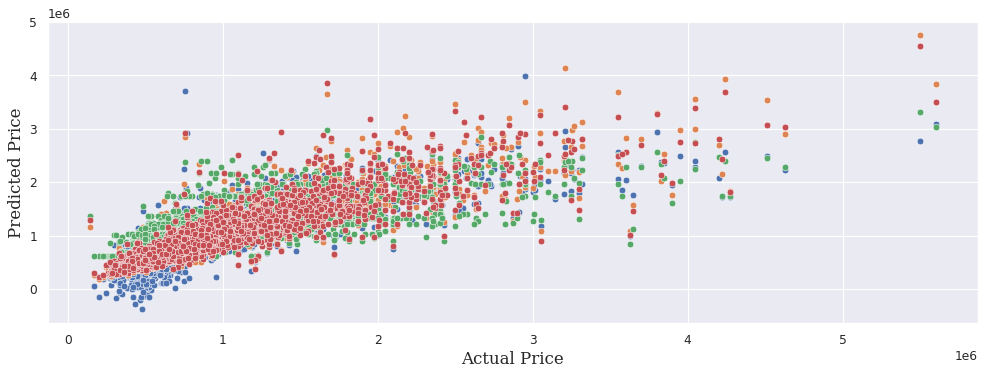

In [609]:
plt.figure(figsize=(15, 5), dpi=80)
sns.scatterplot(x=compare_dataFrame.Price, y=compare_dataFrame.pred_LR)
sns.scatterplot(x=compare_dataFrame.Price, y=compare_dataFrame.pred_GD)
sns.scatterplot(x=compare_dataFrame.Price, y=compare_dataFrame.pred_AD)
sns.scatterplot(x=compare_dataFrame.Price, y=compare_dataFrame.pred_RF)

plt.ylabel('Predicted Price', fontfamily='serif', fontsize=15)
plt.xlabel('Actual Price', fontfamily='serif', fontsize=15)
plt.show()

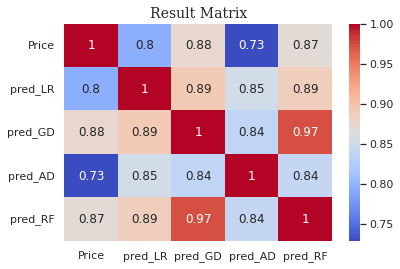

In [610]:
sns.heatmap(compare_dataFrame.corr(), annot=True, cmap='coolwarm')
plt.title('Result Matrix', fontfamily='serif', fontsize=14)
plt.show()